In [139]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import cm

from scipy.stats import mode
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import pearsonr as corr

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

global_seed = 20230831

from main_cifar10 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cuda


In [104]:
log_dir = 'results/test4/'
with open(os.path.join(log_dir, 'results.pkl'), 'rb') as f:
    results = pickle.load(f)

results['layer1'].keys()

dict_keys(['output_shape', 'activations', 'activations_normed', 'kmeans_num_dic', 'kmeans_128', 'kmeans_128dist', 'kmeans_256', 'kmeans_256dist', 'kmeans_512', 'kmeans_512dist', 'data_train', 'data_test', 'data_train_kmeans_128', 'data_test_kmeans_128', 'data_train_kmeans_256', 'data_test_kmeans_256', 'data_train_kmeans_512', 'data_test_kmeans_512', 'probabilities', 'probabilities_kmeans_128', 'probabilities_kmeans_256', 'probabilities_kmeans_512', 'monosemanticity', 'monosemanticity_kmeans_128', 'monosemanticity_kmeans_256', 'monosemanticity_kmeans_512', 'kmeans_128_top', 'kmeans_128_topdist', 'data_train_kmeans_128_top', 'data_test_kmeans_128_top', 'monosemanticity_kmeans_128_top', 'kmeans_128_bottom', 'kmeans_128_bottomdist', 'data_train_kmeans_128_bottom', 'data_test_kmeans_128_bottom', 'monosemanticity_kmeans_128_bottom', 'kmeans_256_top', 'kmeans_256_topdist', 'data_train_kmeans_256_top', 'data_test_kmeans_256_top', 'monosemanticity_kmeans_256_top', 'kmeans_256_bottom', 'kmeans_2

# Find coactive units for Polysemantic neurons

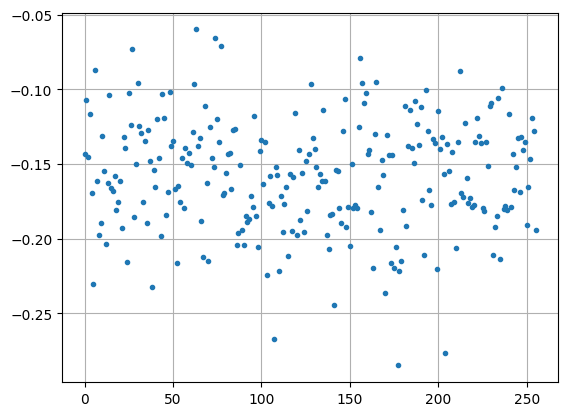

In [105]:
monosemanticity = -results['layer1']['monosemanticity']
plt.plot(monosemanticity, '.')
plt.grid()

In [107]:
Y = results['layer1']['activations'].copy()
Y -= np.mean(Y, 0)
Y /= np.std(Y, 0)

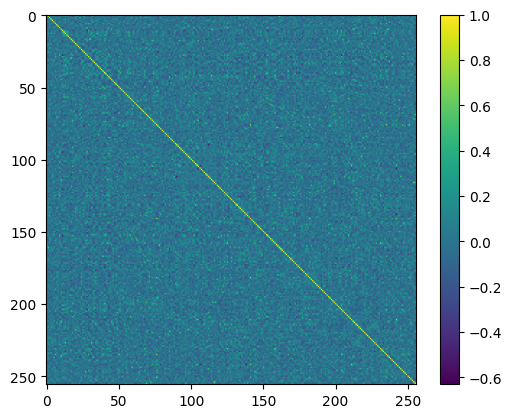

In [108]:
# Correlate
correlations = np.corrcoef(Y.T)
plt.imshow(correlations)
plt.colorbar()

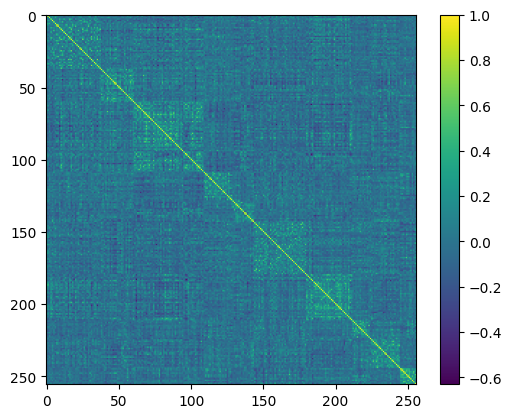

In [109]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 10
clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    affinity='precomputed',
    linkage='average'
).fit(-correlations)

Y_clustered = []
for i in range(n_clusters):
    ind = clustering.labels_ == i
    Y_clustered.append(Y[:, ind].copy())
Y_clustered = np.concatenate(Y_clustered, 1)

correlations1 = np.corrcoef(Y_clustered.T)
plt.imshow(correlations1)
plt.colorbar()
plt.show()

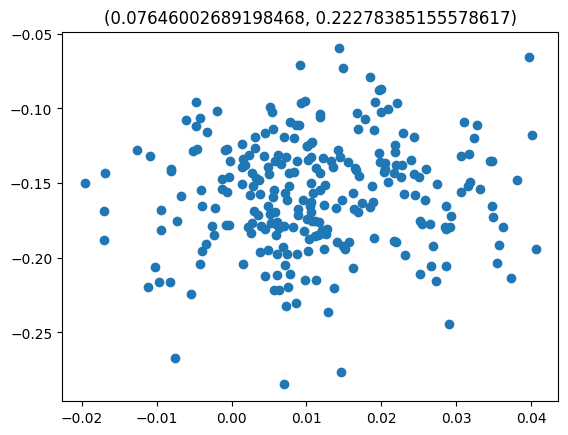

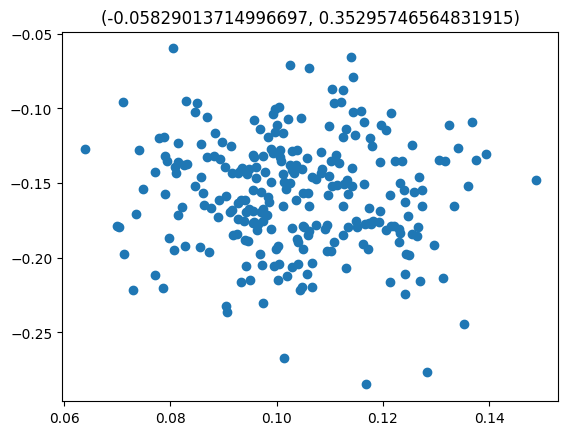

In [110]:
plt.scatter(correlations.mean(1), monosemanticity)
plt.title(corr(correlations.mean(1), monosemanticity))
plt.show()

plt.scatter(abs(correlations).mean(1), monosemanticity)
plt.title(corr(abs(correlations).mean(1), monosemanticity))
plt.show()

204


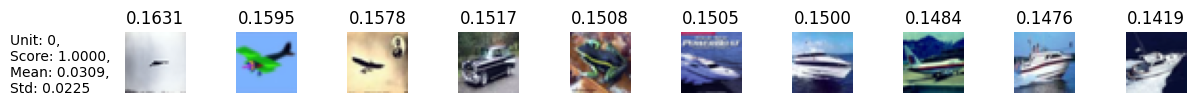

In [119]:
poly_ind = np.argsort(monosemanticity)[1]
print(poly_ind)

plot_meis(results['layer1']['activations'][:, poly_ind:poly_ind + 1],
           [1], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

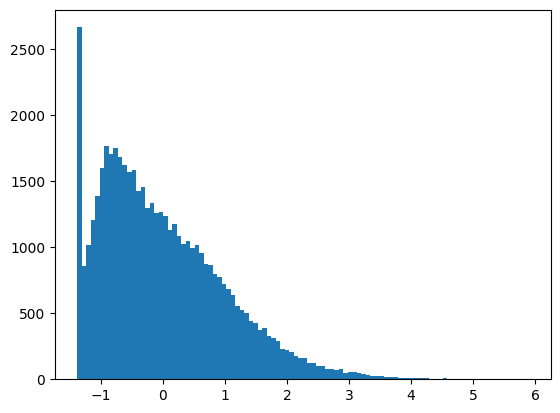

In [120]:
Y = results['layer1']['activations'].copy()
Y -= np.mean(Y, 0)
Y /= np.std(Y, 0)
y = Y[:, poly_ind].copy()
plt.hist(y, 100)
plt.show()

In [48]:
results['inputs'].shape, results['layer1']['activations'][:, poly_ind].shape

((50000, 3, 32, 32), (50000,))

array([204, 235, 201, 246])

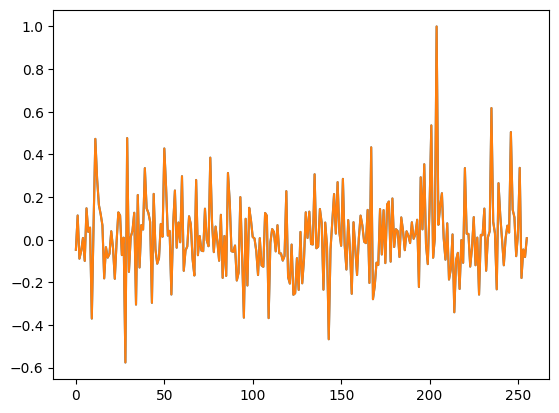

In [121]:
# weighted coactivations
tmp = np.mean(y[:, None] * Y, 0)
plt.plot(tmp)
plt.plot(correlations[poly_ind])
np.argsort(tmp)[::-1][:4]

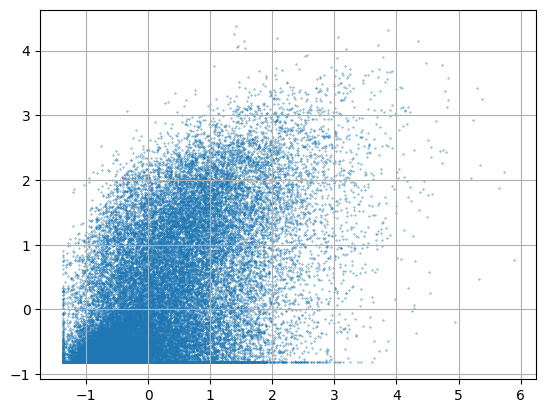

In [122]:
plt.scatter(Y[:, poly_ind], Y[:, 235], s=.1)
plt.grid()

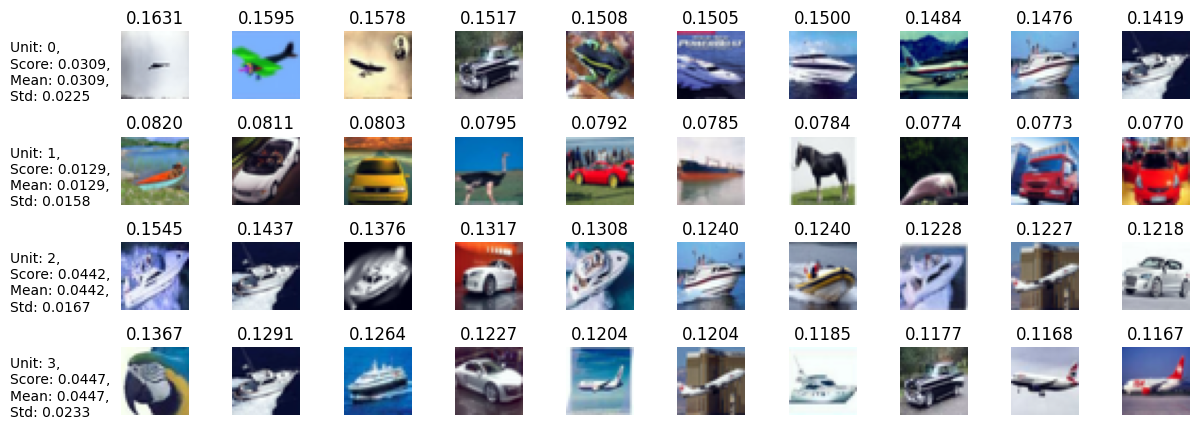

In [123]:
ind_sort = np.argsort(tmp)[::-1][:4]
plot_meis(results['layer1']['activations'][:, ind_sort],
          None, 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

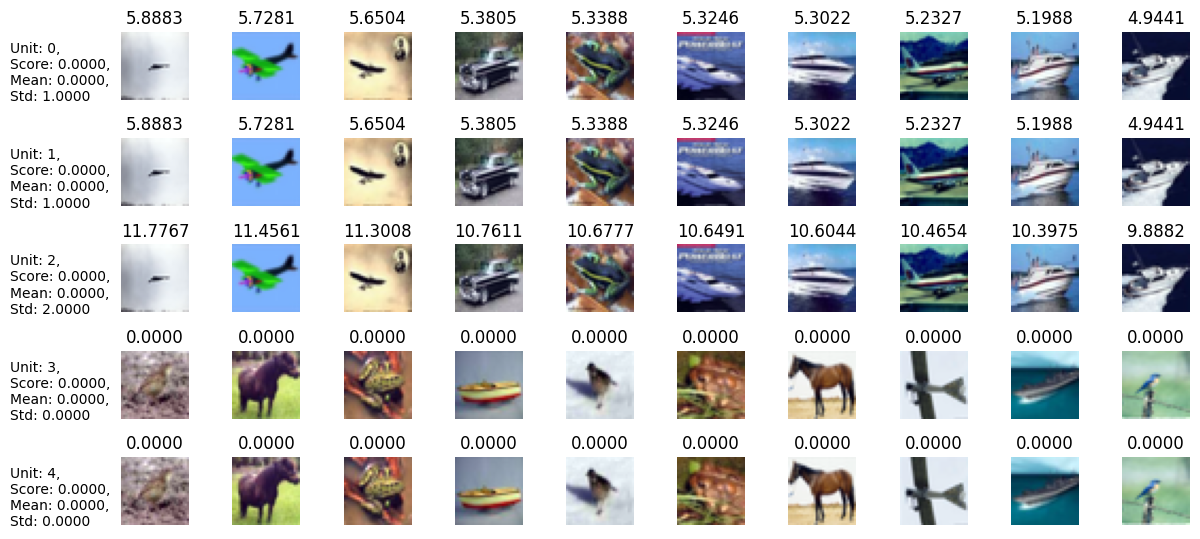

204 and 204 corr 1.0 scores [-0.27663785 -0.27663785 -0.27663785 -0.21384621 -0.21384621]


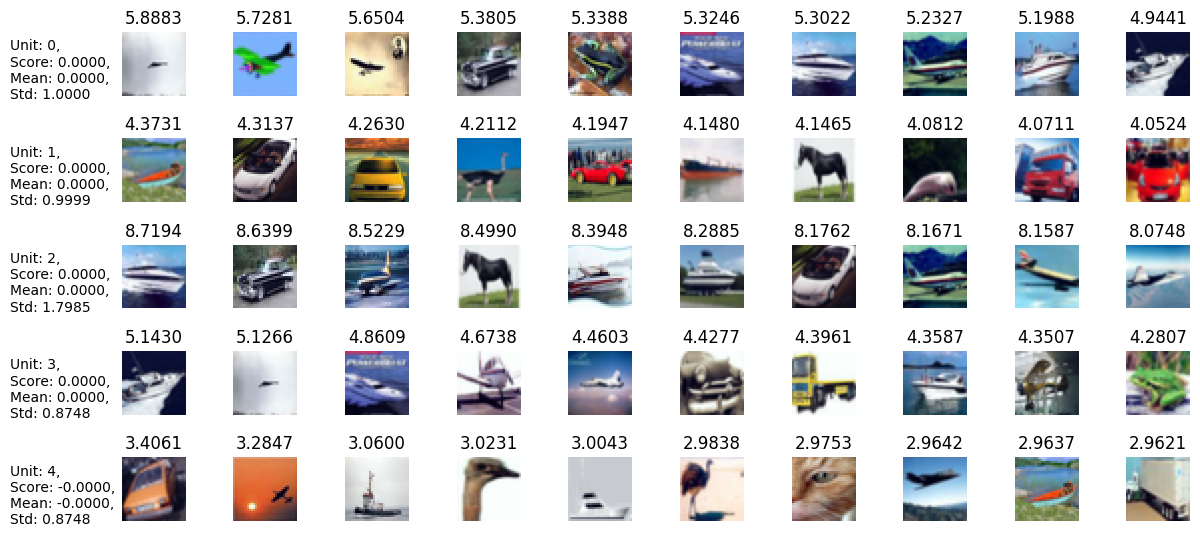

204 and 235 corr 0.6173614596556043 scores [-0.27663785 -0.21330398 -0.17241262 -0.1733593  -0.29998055]


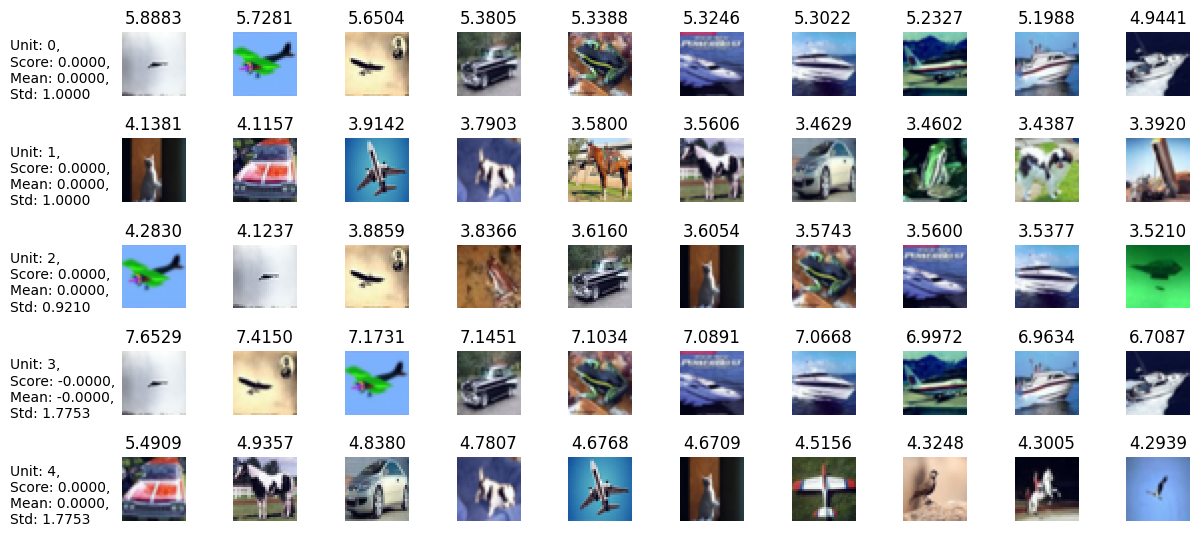

204 and 28 corr -0.5758568242274623 scores [-0.27663785 -0.18528271 -0.32018664 -0.27663785 -0.14948457]


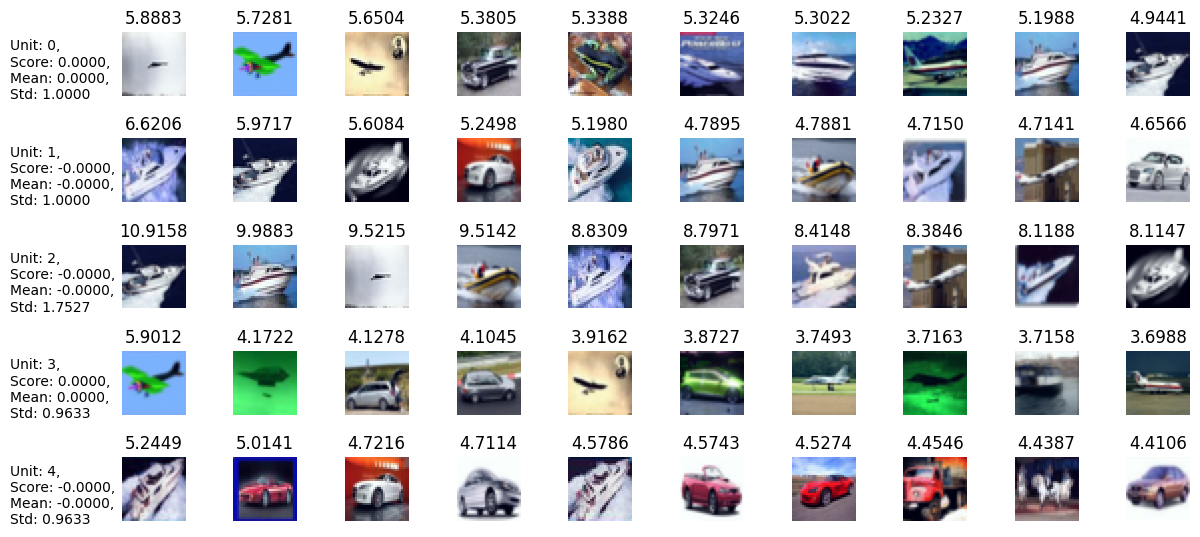

204 and 201 corr 0.5360014244849336 scores [-0.27663785 -0.13992561 -0.17540692 -0.25690767 -0.1823424 ]


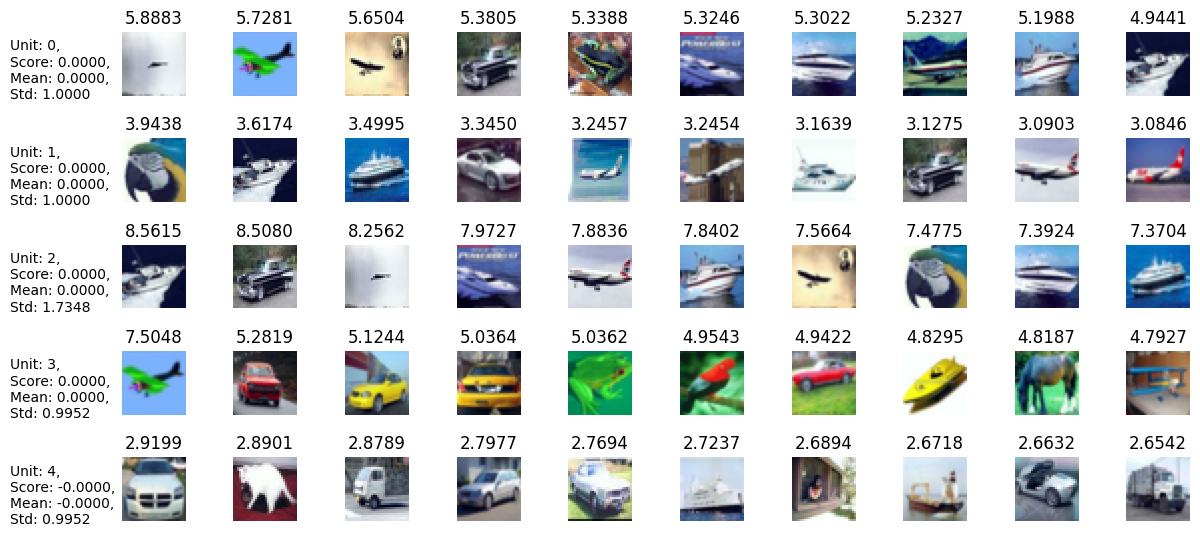

204 and 246 corr 0.5047731089059241 scores [-0.27663785 -0.16898823 -0.20368598 -0.22872283 -0.11384294]


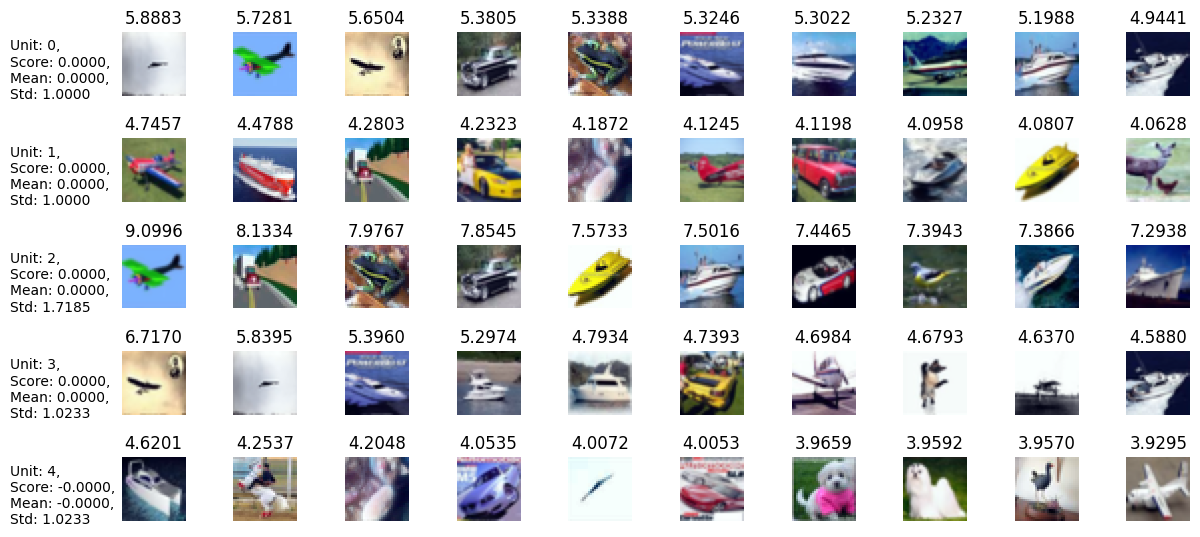

204 and 29 corr 0.4764812277247002 scores [-0.27663785 -0.14987957 -0.20376444 -0.21234062 -0.24919532]


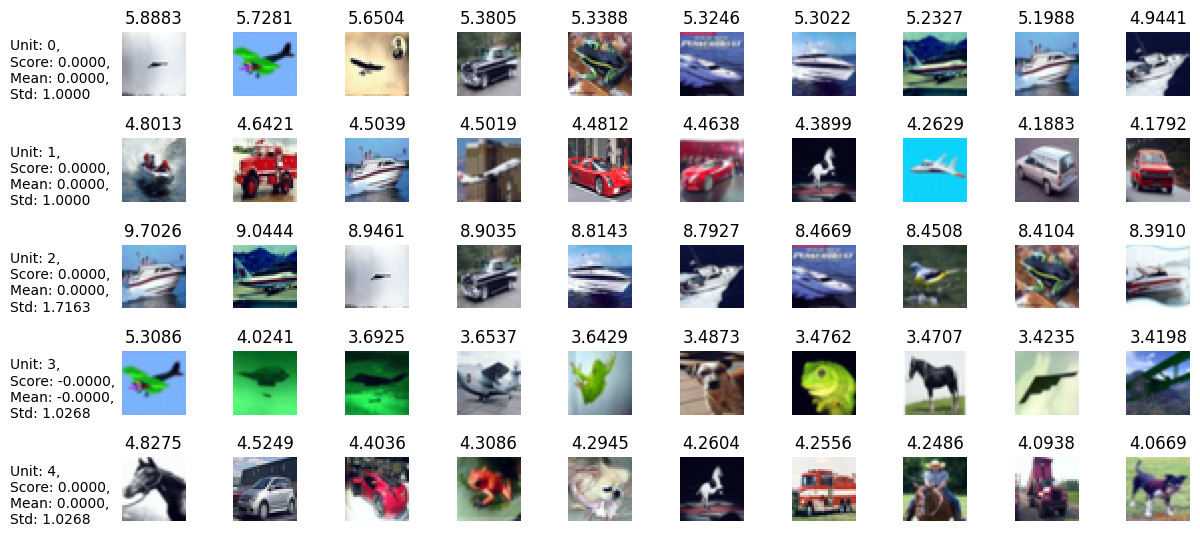

204 and 11 corr 0.47286007308036637 scores [-0.27663785 -0.15452026 -0.1899168  -0.20631333 -0.18306738]


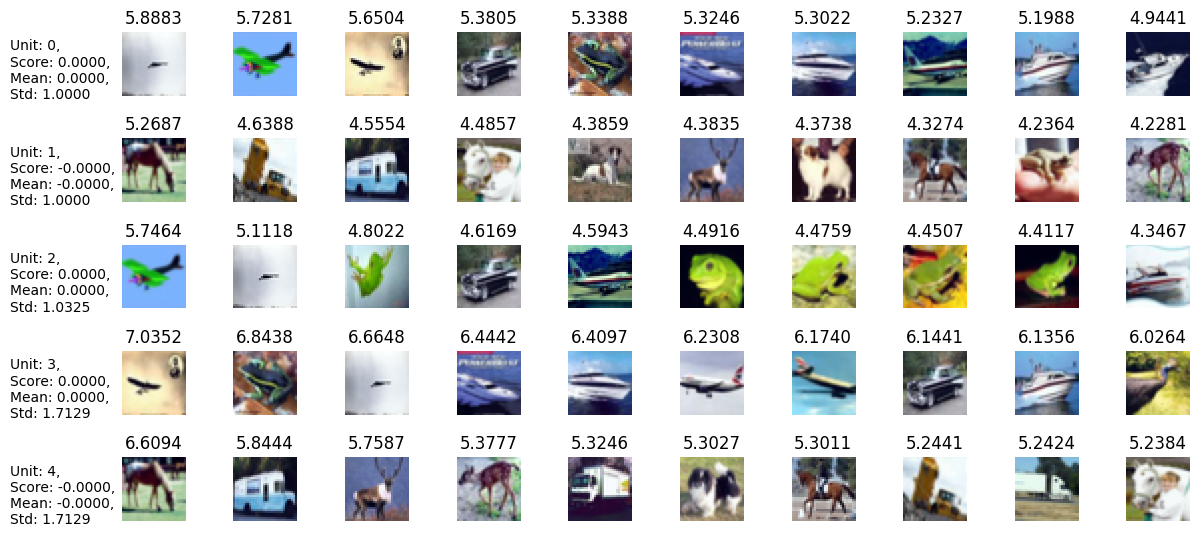

204 and 143 corr -0.4669851946375603 scores [-0.27663785 -0.15434021 -0.24633999 -0.25369582 -0.12926826]


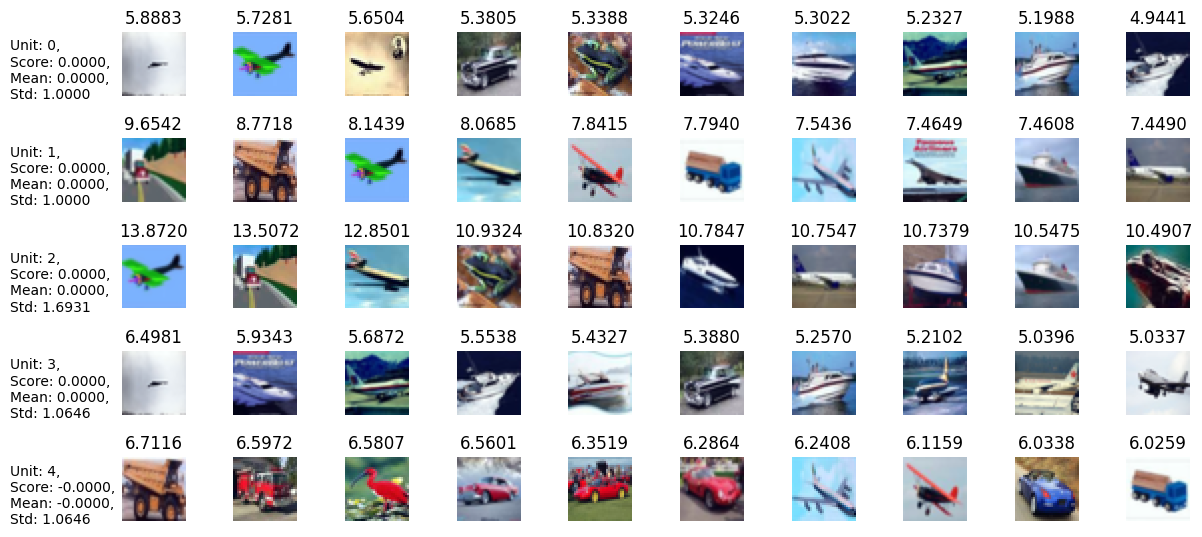

204 and 167 corr 0.43332682762033675 scores [-0.27663785 -0.19386864 -0.21317892 -0.18021645 -0.11208357]


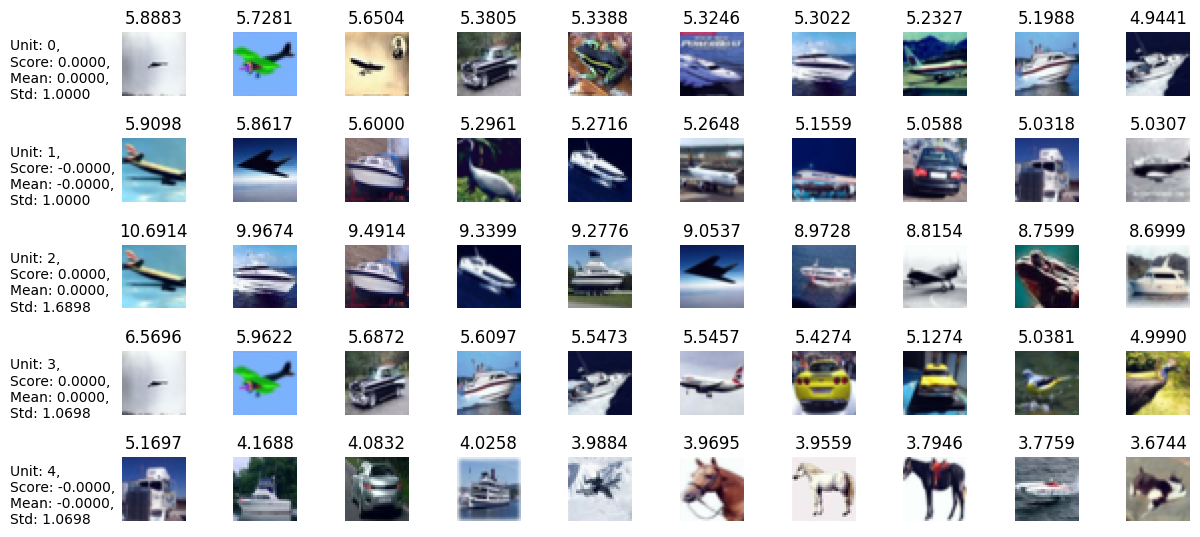

204 and 50 corr 0.4277624289768856 scores [-0.27663785 -0.1347696  -0.13168228 -0.23560967 -0.19158775]


In [124]:
corr_ = correlations[poly_ind].copy()
ind_sort = np.argsort(abs(corr_))[::-1][:10]
for ind in ind_sort:
    a = y.copy()
    b = Y[:, ind].copy()
    #a -= np.min(a)
    #a /= np.max(a)
    #b -= np.min(b)
    #b /= np.max(b)
    tmp = np.stack([a, b, a + b, a - b, b - a], 1)
    plot_meis(tmp,
            None, 
            results['inputs'], '', 
            num_show=10, show_all=True, plot=True)

    data_train, _ = get_mei_data(tmp, results['inputs'])
    scores = -get_monosemanticity(data_train)
    print(
        poly_ind, 'and', ind, 
        'corr', corr_[ind],
        'scores', scores
    )

# Systematically, for each neuron check if there is any synergy in top K correlations

In [254]:
num_neuron = 256
num_test = 10

ind_mi = np.argsort(monosemanticity)

scores = np.zeros((num_neuron, num_test, 5))
corr_tested = np.zeros((num_neuron, num_test))

for i in range(num_neuron):
    poly_ind = ind_mi[i]
    print(i, 'pick unit', poly_ind, 'MI', monosemanticity[poly_ind])
    y = Y[:, poly_ind].copy()

    corr_ = correlations[poly_ind].copy()
    ind_sort = np.argsort(abs(corr_))[::-1][1:][:num_test]
    for j, ind in enumerate(ind_sort):
        a = y.copy()
        b = Y[:, ind].copy()
        #a -= np.min(a)
        #a /= np.max(a)
        #b -= np.min(b)
        #b /= np.max(b)
        tmp = np.stack([a, b, a + b, a - b, b - a], 1)
        #plot_meis(tmp,
        #        None, 
        #        results['inputs'], '', 
        #        num_show=10, show_all=True, plot=True)

        data_train, _ = get_mei_data(tmp, results['inputs'])
        scores[i, j] = -get_monosemanticity(data_train)
        corr_tested[i, j] = corr_[ind]
        #print(
        #    poly_ind, 'and', ind, 
        #    'corr', corr_[ind],
        #    'scores', scores[i, j]
        #)
    

0 pick unit 177 MI -0.2848411500453949
1 pick unit 204 MI -0.27663785219192505
2 pick unit 107 MI -0.2672181725502014
3 pick unit 141 MI -0.2443256974220276
4 pick unit 170 MI -0.23617666959762573
5 pick unit 38 MI -0.23257935047149658
6 pick unit 5 MI -0.2302209883928299
7 pick unit 103 MI -0.22444099187850952
8 pick unit 110 MI -0.22185713052749634
9 pick unit 178 MI -0.22177007794380188
10 pick unit 199 MI -0.22024530172348022
11 pick unit 163 MI -0.2193186730146408
12 pick unit 175 MI -0.21924583613872528
13 pick unit 173 MI -0.21648047864437103
14 pick unit 52 MI -0.21612295508384705
15 pick unit 24 MI -0.2152390033006668
16 pick unit 70 MI -0.21493728458881378
17 pick unit 179 MI -0.21486805379390717
18 pick unit 235 MI -0.21330398321151733
19 pick unit 67 MI -0.21253560483455658
20 pick unit 115 MI -0.21155771613121033
21 pick unit 192 MI -0.21120494604110718
22 pick unit 231 MI -0.21057727932929993
23 pick unit 138 MI -0.20654624700546265
24 pick unit 210 MI -0.2062572240829467

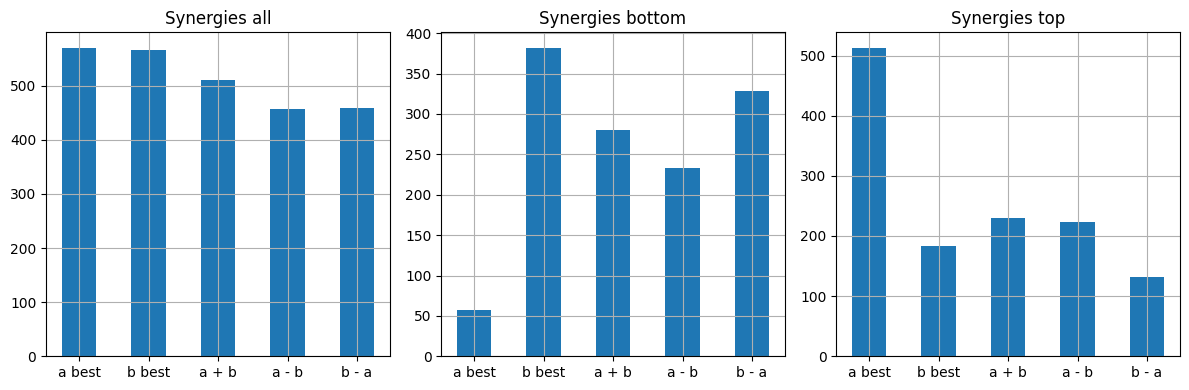

In [191]:
indices = [
    np.arange(256),
    np.arange(128),
    np.arange(128, 256)
]

plt.figure(figsize=(12, 4))
for i, ind in enumerate(indices):
    plt.subplot(1, 3, 1 + i)
    #plt.bar(*np.unique(np.argmax(scores[ind], axis=2), return_counts=True))
    plt.hist(
        np.argmax(scores[ind], axis=2).flatten(), 
        bins=[0, 1, 2, 3, 4, 5], rwidth=0.5

    )
    plt.xticks(
        np.arange(5) + .5,
        [
            'a best',
            'b best',
            'a + b',
            'a - b',
            'b - a',
        ],
        rotation=0
    )
    plt.grid()
    plt.title('Synergies ' + ['all', 'bottom', 'top'][i])


plt.tight_layout()
plt.show()

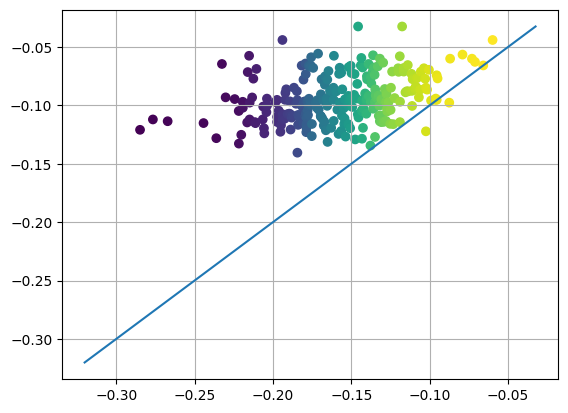

In [216]:
plt.scatter(
    scores[:, 0, 0],  # == monosemanticity
    np.max(scores[:, :, 2:], axis=(1, 2)), 
    c=np.arange(256)
)
plt.plot(
    (scores.min(), scores.max()),
    (scores.min(), scores.max()),
)
plt.grid()

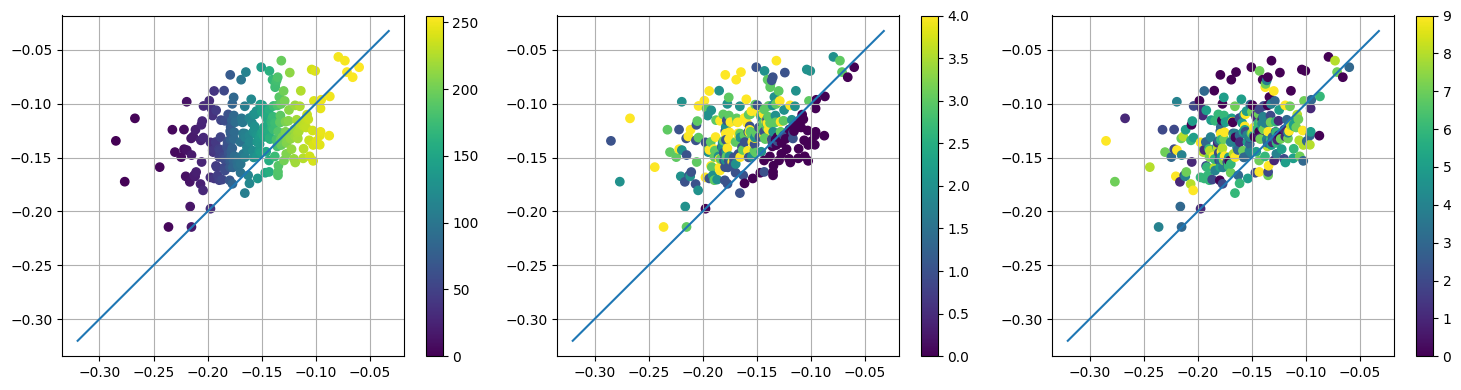

In [227]:
plt.figure(figsize=(15, 4))
for i in range(3):
    plt.subplot(1, 3, 1 + i)
    for j in range(1):#num_test):
        c = [
            np.arange(256), 
            scores[:, 0].argmax(1),
            scores.max(2).argmax(1),
        ][i]
        plt.scatter(
            scores[:, j, 0],  # == monosemanticity
            np.max(scores[:, j, 2:], axis=(1)), 
            c=c
        )
    plt.plot(
        (scores.min(), scores.max()),
        (scores.min(), scores.max()),
    )
    plt.grid()
    plt.colorbar()
plt.tight_layout()
plt.show()

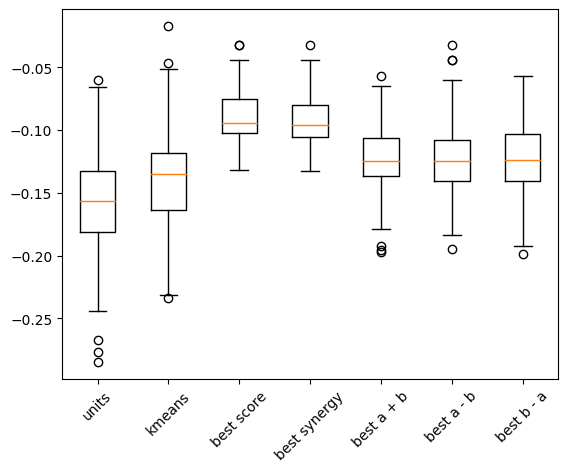

In [257]:
plt.boxplot([
    monosemanticity,
    -results['layer1']['monosemanticity_kmeans_256'],
    scores.max((1, 2)),
    scores[:, 2:].max((1, 2)),
    scores[:, 2].max(1),
    scores[:, 3].max(1),
    scores[:, 4].max(1)
])
plt.xticks(
    np.arange(7) + 1,
    [
        'units',
        'kmeans',
        'best score',
        'best synergy',
        'best a + b',
        'best a - b',
        'best b - a'
    ],
    rotation=45
)
plt.show()

In [259]:
# All pairs
num_neuron = 256
scores_all = np.zeros((num_neuron, num_neuron))
for i in range(num_neuron):
    print(i)
    a = Y[:, i].copy()
    for j in range(i + 1, num_neuron):
        b = Y[:, j].copy()
        combined = (a + b)[:, None]
        data_train, _ = get_mei_data(combined, results['inputs'])
        scores_all[i, j] = -get_monosemanticity(data_train)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


KeyboardInterrupt: 

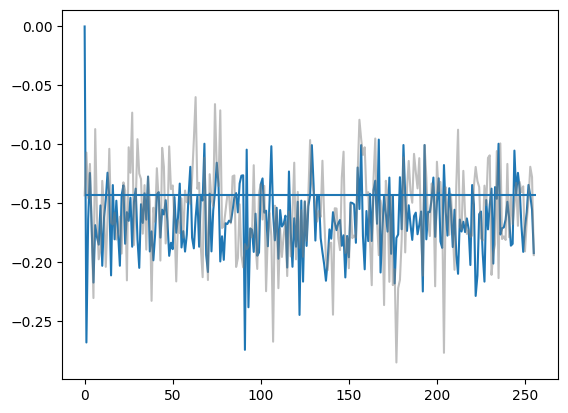

In [270]:
plt.plot(scores_all[0])
plt.plot(monosemanticity, color='grey', alpha=.5)
plt.hlines(monosemanticity[0], 0, 256)

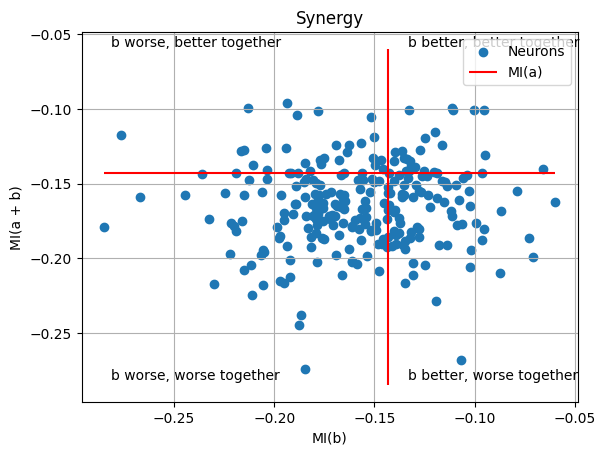

In [296]:

plt.scatter(monosemanticity[1:], scores_all[0, 1:])
plt.hlines(monosemanticity[0], monosemanticity.min(), monosemanticity.max(), 'red')
plt.vlines(monosemanticity[0], monosemanticity.min(), monosemanticity.max(), 'red')
plt.legend(['Neurons', 'MI(a)'])
plt.xlabel('MI(b)')
plt.ylabel('MI(a + b)')
plt.title('Synergy')
plt.grid()

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

plt.text(xlim[0] * .95, ylim[0] * .95, 'b worse, worse together')
plt.text(xlim[0] * .95, ylim[1] * 1.2, 'b worse, better together')
plt.text(monosemanticity[0] + .01, ylim[0] * .95, 'b better, worse together')
plt.text(monosemanticity[0] + .01, ylim[1] * 1.2, 'b better, better together')

print()
plt.show()

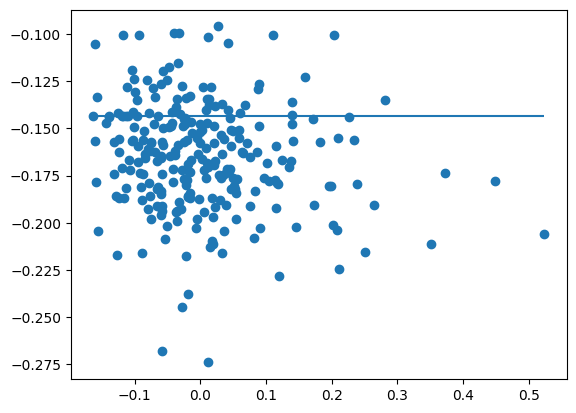

In [277]:
plt.scatter(correlations[0, 1:], scores_all[0, 1:])
plt.hlines(monosemanticity[0], correlations[0, 1:].min(), correlations[0, 1:].max())
plt.show()

# Prior Tests

In [145]:
centers = results['layer1']['kmeans_256'].cluster_centers_.copy()
centers -= np.min(centers, 1)
centers /= np.max(centers, 1)

151

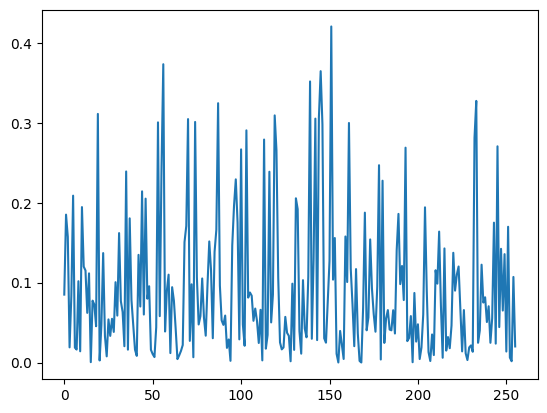

In [146]:
plt.plot(centers[:, 177])
np.argmax(centers[:, 177])

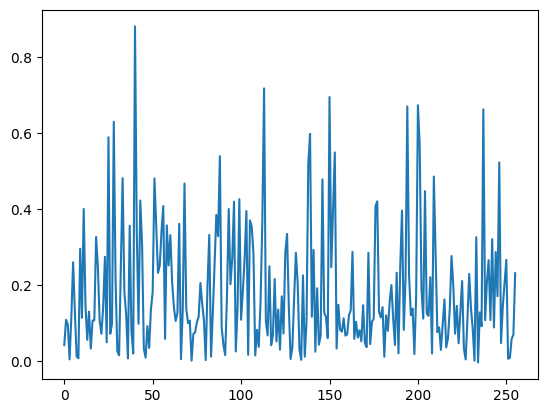

In [147]:
plt.plot(centers[151])

In [121]:
# pairwise
data = results['layer1']['activations'].copy()
data /= np.std(data, 0)
num_data, num_unit = data.shape
scores = -results['layer1']['monosemanticity']
scores_avg = np.zeros((num_unit, num_unit))
scores_com = np.zeros((num_unit, num_unit, 3)) # (a + b), (a - b), (b - a)

ind_sort = np.argsort(scores)

for i in range(5):
    ind = ind_sort[i]
    print(i, ind, scores[ind])
    scores_avg[i] = (scores[ind] + scores) / 2
    # (a + b)
    combinations = data[:, ind:ind + 1] + data
    data_train, _ = get_mei_data(combinations, results['inputs'])
    scores_com[i, :, 0] = -get_monosemanticity(data_train)
    # (a - b)
    combinations = data[:, ind:ind + 1] - data
    data_train, _ = get_mei_data(combinations, results['inputs'])
    scores_com[i, :, 1] = -get_monosemanticity(data_train)
    # (b - a)
    combinations = data - data[:, ind:ind + 1]
    data_train, _ = get_mei_data(combinations, results['inputs'])
    scores_com[i, :, 2] = -get_monosemanticity(data_train)
    print(np.max(scores_com[i].max(1) - scores_avg[i]))

0 177 -0.2848411500453949
0.14319662004709244
1 204 -0.27663785219192505
0.13400764763355255
2 107 -0.2672181725502014
0.12475603818893433
3 141 -0.2443256974220276
0.13400764763355255
4 170 -0.23617666959762573
0.0959278866648674


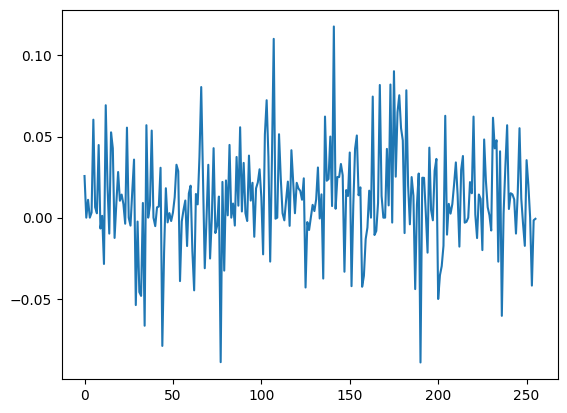

141

In [136]:
plt.plot(scores_com[1].max(1) - scores)
plt.show()
np.argmax(scores_com[1].max(1) - scores)

In [137]:
scores_com[1, 141].argmax()

0

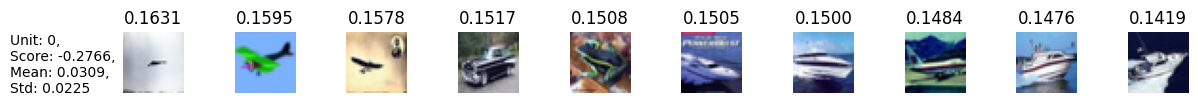

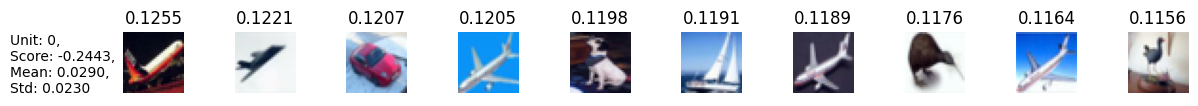

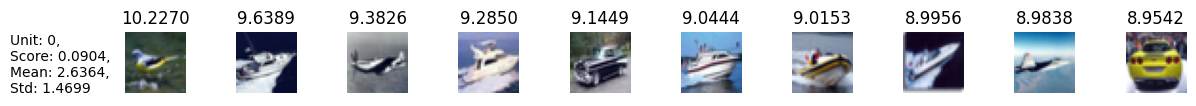

In [138]:
a = 204
b = 141

plot_meis(results['layer1']['activations'][:, a:a + 1],
           scores[a:a + 1], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

plot_meis(results['layer1']['activations'][:, b:b + 1],
           scores[b:b + 1], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

tmp = data[:, a:a + 1] + data[:, b:b + 1]

plot_meis(tmp,
          [np.max(scores_com[0].max(1) - scores)], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

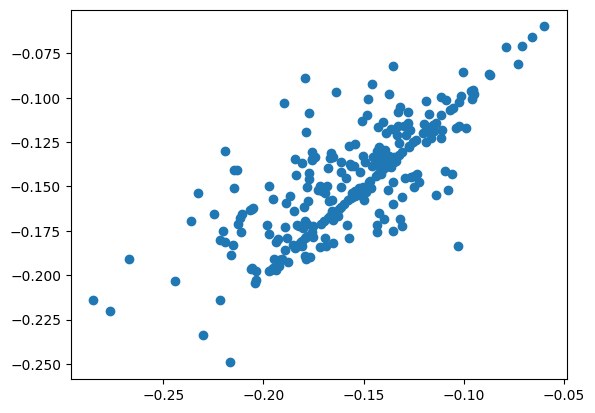

In [122]:
plt.scatter(scores, scores_com[0].max(1))

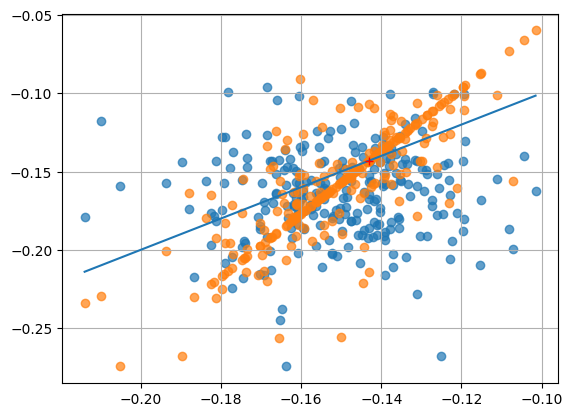

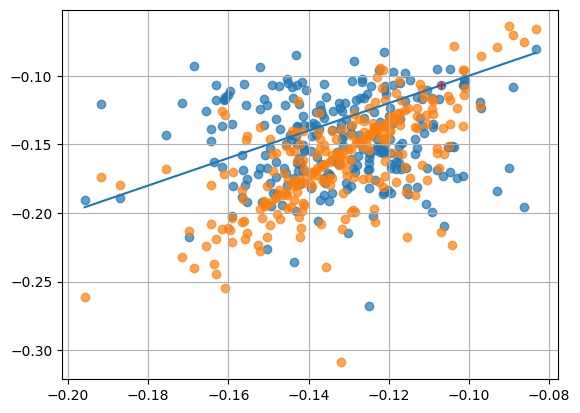

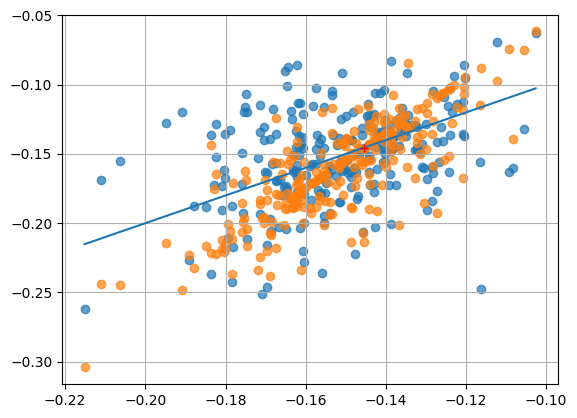

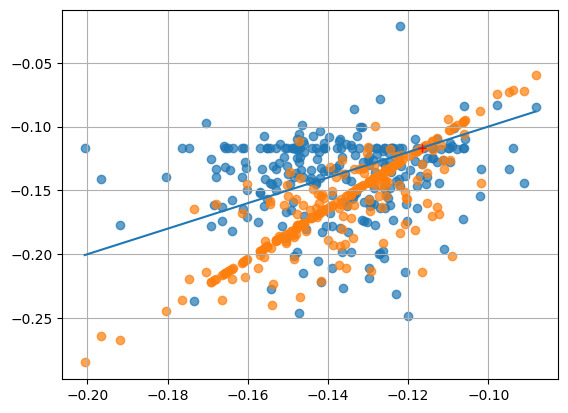

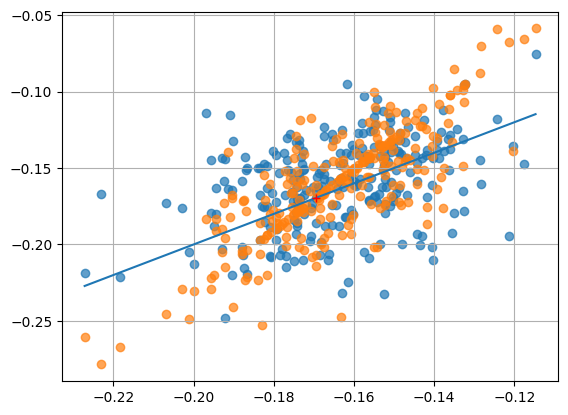

In [119]:
for i in range(5):
    plt.scatter(scores_avg[i], scores_pos[i], alpha=.7)
    plt.scatter(scores_avg[i], scores_neg[i], alpha=.7)
    plt.grid()
    plt.plot((scores_avg[i].min(), scores_avg[i].max()), 
            (scores_avg[i].min(), scores_avg[i].max()))
    plt.plot(scores[i], scores[i], '+', color='red')
    plt.show()

In [5]:
scores = -results['layer1']['monosemanticity']
ind = np.argmin(scores)
print(scores[ind], ind)

-0.2848411500453949 177


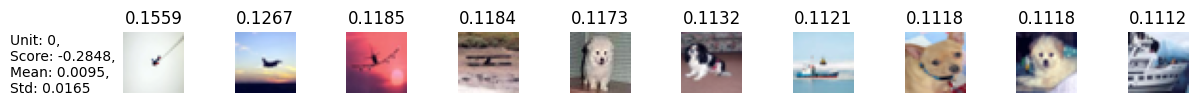

In [28]:
plot_meis(results['layer1']['activations'][:, ind:ind + 1], scores[ind:ind + 1], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

In [4]:
results['layer1']['activations'].shape

(50000, 256)

In [103]:
data = results['layer1']['activations'].copy()
data /= np.std(data, 0)
num_data, num_unit = data.shape
combinations_pos = np.zeros((num_data, num_unit))
combinations_neg = np.zeros((num_data, num_unit))
scale = .3
combinations_pos = data[:, ind:ind + 1] + scale * data
combinations_neg = data[:, ind:ind + 1] - scale * data

In [104]:
data_train, _ = get_mei_data(combinations_pos, results['inputs'])
scores_pos = -get_monosemanticity(data_train)
data_train, _ = get_mei_data(combinations_neg, results['inputs'])
scores_neg = -get_monosemanticity(data_train)
data_train.shape

(256, 5, 3, 32, 32)

In [105]:
scores_pos -= scores
scores_neg -= scores

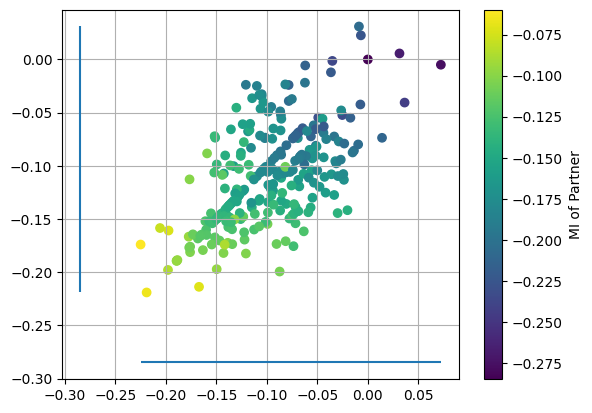

In [106]:
plt.scatter(scores_pos, scores_neg, c=scores)
plt.hlines(scores[ind], scores_pos.min(), scores_pos.max())
plt.vlines(scores[ind], scores_neg.min(), scores_neg.max())
plt.grid()
plt.colorbar(label='MI of Partner')

In [98]:
ind_best_pos = scores_pos.argmax()
print(scores_pos.argmax(), scores_pos[ind_best_pos], scores[ind_best_pos])

204 0.07230265438556671 -0.27663785219192505


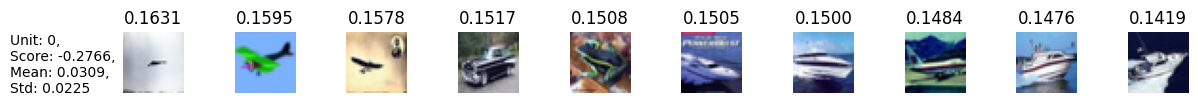

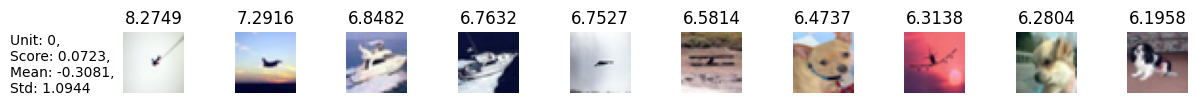

In [99]:
plot_meis(results['layer1']['activations'][:, ind_best_pos:ind_best_pos + 1],
           scores[ind_best_pos:ind_best_pos + 1], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

plot_meis(combinations_pos[:, ind_best_pos:ind_best_pos + 1],
          scores_pos[ind_best_pos:ind_best_pos + 1], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

In [100]:
ind_best_neg = scores_neg.argmax()
print(scores_neg.argmax(), scores_neg[ind_best_neg], scores[ind_best_neg])

210 0.031008541584014893 -0.20625722408294678


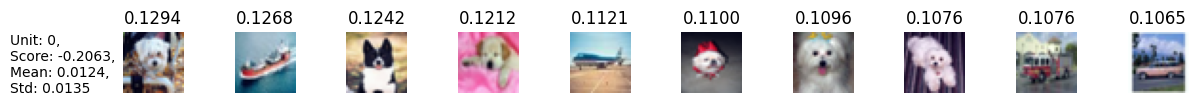

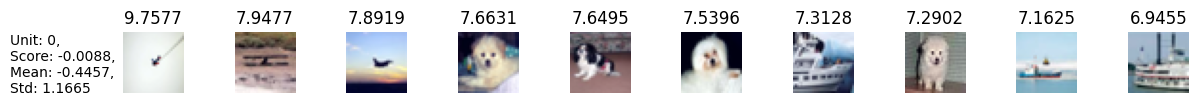

In [101]:
plot_meis(results['layer1']['activations'][:, ind_best_neg:ind_best_neg + 1],
           scores[ind_best_neg:ind_best_neg + 1], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

plot_meis(combinations_pos[:, ind_best_neg:ind_best_neg + 1],
          scores_pos[ind_best_neg:ind_best_neg + 1], 
          results['inputs'], '', 
          num_show=10, show_all=True, plot=True)

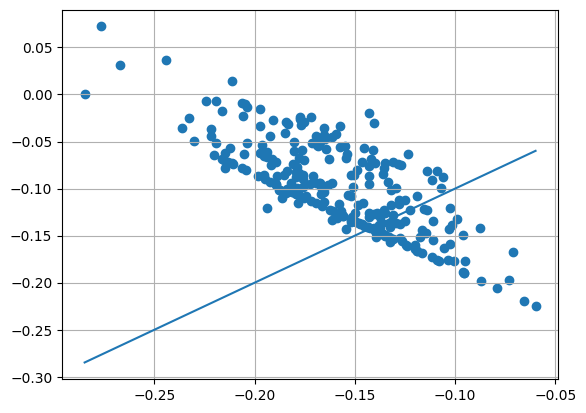

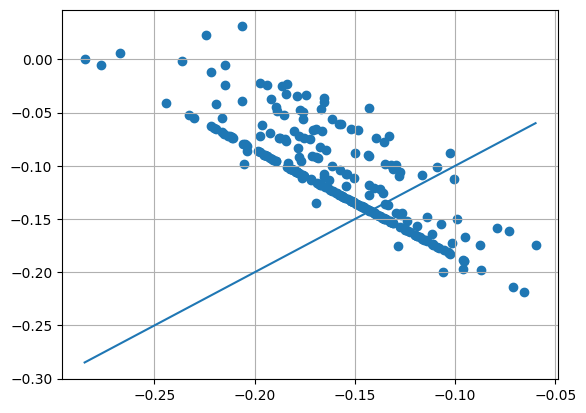

In [102]:
plt.scatter(scores, scores_pos)
plt.plot((scores.min(), scores.max()), (scores.min(), scores.max()))
plt.grid()
plt.show()

plt.scatter(scores, scores_neg)
plt.plot((scores.min(), scores.max()), (scores.min(), scores.max()))
plt.grid()
plt.show()